___
# Ciência dos Dados - PROJETO 1

## Lúcia Coelho Richardson

### Projeto 1

___
## Introdução
Por meio do meu trabalho eu viso analisar como as diversas faixas salariais influenciam na escolha pelo acesso a internet e consequentemente as taxas de conectividade(variável que caracteriza o quanto a população das regiões estão conectadas, demonstrando por meio das tabelas e gráficos qual é a escolha da ou das mais viáveis economicamente e de maneira prática a cada região). Além de como o salário tem importancia crucial nesse aspecto.


___
## Análise e Resultados - 2015

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.style.use('ggplot')
from numpy import zeros_like

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\Music\Ciencia-dos-Dados-2017.2\CD17\Projeto1


In [3]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2015.csv',sep=',')
#conexao apenas 3g4g é mais escolhida em faixas de salario menor se comparado a banda larga, que é muito alta e relevante
#as faixas salariais mais elevadas

In [4]:
#escolhendo as variaveis na base de dados e retirada dos nulos
escolha_var = dados.loc[:,["UF","V02324","V4622", "V02424", "V02425", "V02426", "V4621"]] 

dados_nao_nulos = escolha_var[pd.notnull(escolha_var.V02324)]
dados_nao_nulos = dados_nao_nulos[pd.notnull(dados_nao_nulos.V4622)]
dados_nao_nulos = dados_nao_nulos[pd.notnull(dados_nao_nulos.V02324)]
dados_nao_nulos= dados_nao_nulos[dados_nao_nulos.V4621!=999999999999.0]

dados = dados_nao_nulos

___
## Desenvolvimento

Nessa etapa do projeto foi onde realizei a:

-A organização de todas minhas variáveis de interesse 

-Separacao em relação ao nivel de conectividade, para que por meio das informações obtidas fosse possível avaliar, e até comparar as regiões do Brasil e seu acesso/ utilização de cada um dos "meios" de acesso a internet, e a interligação entre elas. Os quais são:

Discada, que indica uma baixa conexão devido ser um método antiquadro e não tão vantajoso de acesso a internet.

Banda Larga, que indica uma média conexão, devido ser um método ainda muito utilizado de acesso a internet, porém limitado se comparado ao 3G e 4G, por não ser uma tecnologia móvel, por exemplo.

3G, 4G: que indica uma média razoável, devido ser é a terceira geração da tecnologia que permite acessar a internet com o celular e se caracterizar como uma tecnologia móvel. 

E a partir da associação dessas, estabelece-se maiores níveis de conectividade que seriam tais juntas. Uma vez que a boa conexao seria uma união entre a banda larga e discada, uma ótima conexão seria a união entre a internet discada e o 3g/4g. Somado a isso, o tipo de conexão excelente seria a associação entre a internet 3g/4g e a banda larga. E por último o tipo de conexão excepcional seria a associação entre todos os tipos citados anteriormente. 

-A divisão dos estados conforme as regiões para conseguir ter diferentes análises gráficas interessantes

-A divisão conforme renda das faixas salariais, também analisadas


In [5]:
#divisao em estados para melhor organizacao e chegar ao meu objetivo no projeto
dados.UF = dados.UF.astype("int")
dados.loc[dados.UF >=50, "Regiao"] = "Centro-Oeste"
dados.loc[(dados.UF >= 41) & (dados.UF <= 43), "Regiao"] = "Sul"
dados.loc[(dados.UF >= 31) & (dados.UF <= 35), "Regiao"] = "Sudeste"
dados.loc[(dados.UF >= 11) & (dados.UF <= 17), "Regiao"] = "Norte"
dados.loc[(dados.UF >= 21) & (dados.UF <= 29), "Regiao"] = "Nordeste"

In [6]:
dados.loc[dados.V02425 == 2, "Conectividade"] = "Baixa conexao (Discada)" #só discada
dados.loc[dados.V02426 == 2, "Conectividade"] = "Media conexao (Banda Larga)" #só banda larga
dados.loc[dados.V02424 == 2, "Conectividade"] = "Razoavel conexao (3G e 4G)" # só 3g4g
dados.loc[(dados.V02425 == 2)&(dados.V02426 == 2), "Conectividade"] = "Boa conexao (Banda larga e discada)" 
dados.loc[(dados.V02425 == 2)&(dados.V02424 == 2), "Conectividade"] = "Otima conexao (Discada e 3g4g)"
dados.loc[(dados.V02426 == 2)&(dados.V02424 == 2), "Conectividade"] = "Excelente conexao (3g4g e banda larga)"
dados.loc[(dados.V02426 == 2)&(dados.V02425 == 2)& (dados.V02424 == 2), "Conectividade"] = "Excepcional conexao (todas)" #todas

In [7]:
#renomeando as categorias para facilitar na analise dos dados
#renomeando as "linhas"
dados_nao_nulos.UF = dados.UF.astype('category')
dados_nao_nulos.UF.cat.categories= (['Rondônia', 'Acre','Amazonas', 'Roraima','Pará', 'Amapá','Tocantis', 'Maranhão','Piauí', 'Ceará','Rio Grande do Norte', 'Paraíba','Pernambuco', 'Alagoas','Sergipe', 'Bahia','Minas Gerais', 'Espírito Santo','Rio de Janeiro', 'São Paulo','Paraná', 'Santa Catarina','Rio Grande do Sul', 'Mato Grosso do Sul','Mato Grosso', 'Goiás' , 'Distrito Federal'])
dados.V02324 = dados.V02324.astype('category')
dados.V02324.cat.categories=["Sim", "Não"]
dados.V02424 = dados.V02424.astype('category')
dados.V02424.cat.categories=["Sim", "Não"]
dados.V02425 = dados.V02425.astype('category')
dados.V02425.cat.categories=["Sim", "Não"]
dados.V02426 = dados.V02426.astype('category')
dados.V02426.cat.categories=["Sim", "Não"]
dados.V4622 = dados.V4622.astype('category')
#dados.V4622
dados.V4622.cat.categories=["sem rendimento","1/4 do salario minimo", "entre 1/2 e 1/4 do salario minimo", "mais de 1/2 salario minimo", "entre 1 e 2 salarios minimos", "entre 2 e 3 salarios minimos", "entre 3 e 5 salarios minimos", "mais de 5 salarios minimos"]


In [8]:
#renomei as colunas principais 
renomear = dados.rename(columns = {"UF": "Estados", "V02324": "Acesso a internet via celular", "V4622":"Salario", "V02424":"Internet via 3G e 4G", "V02425":"Internet via conexao discada", "V02426":"Internet via banda larga", "V4621": "Renda"}) #
renomear


,Estados,Acesso a internet via celular,Salario,Internet via 3G e 4G,Internet via conexao discada,Internet via banda larga,Renda,Regiao,Conectividade
2,Rondônia,Não,entre 1 e 2 salarios minimos,Sim,Não,Sim,1150.0,Norte,Excelente conexao (3g4g e banda larga)
3,Rondônia,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,793.0,Norte,Excelente conexao (3g4g e banda larga)
5,Rondônia,Não,entre 2 e 3 salarios minimos,Não,Não,Sim,1990.0,Norte,Media conexao (Banda Larga)
8,Rondônia,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,818.0,Norte,Excelente conexao (3g4g e banda larga)
10,Rondônia,Sim,entre 2 e 3 salarios minimos,Sim,Não,Sim,1716.0,Norte,Excelente conexao (3g4g e banda larga)
11,Rondônia,Sim,entre 3 e 5 salarios minimos,Sim,Não,Sim,2500.0,Norte,Excelente conexao (3g4g e banda larga)
13,Rondônia,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,1400.0,Norte,Excelente conexao (3g4g e banda larga)
15,Rondônia,Sim,mais de 1/2 salario minimo,Sim,Não,Sim,666.0,Norte,Excelente conexao (3g4g e banda larga)
17,Rondônia,Sim,mais de 1/2 salario minimo,Não,Não,Sim,750.0,Norte,Media conexao (Banda Larga)
18,Rondônia,Sim,entre 1 e 2 salarios minimos,Não,Não,Sim,1437.0,Norte,Media conexao (Banda Larga)


In [49]:
#criacao de tabelas conforme cada regiao do Brasil, que possibilita uma analise macro das taxas de conectividade por regiao e 
#sua relacao com a renda

#tabela sudeste
tabelasudeste= renomear[renomear.Regiao=='Sudeste']
Renda_cat = pd.cut(tabelasudeste.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100


(197, 731]      33.651894
(731, 1265]     31.631592
(1265, 1799]    15.469176
(1799, 2333]     8.546670
(2333, 2867]     4.728893
(2867, 3401]     3.713791
(3401, 3935]     2.257985
Name: Renda, dtype: float64

In [50]:
#tabela sul
tabelasul= renomear[renomear.Regiao=='Sul']
Renda_cat = pd.cut(tabelasul.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100


(197, 731]      25.508858
(731, 1265]     32.444403
(1265, 1799]    18.563890
(1799, 2333]    10.525820
(2333, 2867]     6.181681
(2867, 3401]     4.476065
(3401, 3935]     2.299284
Name: Renda, dtype: float64

In [51]:
#tabela norte
tabelanorte= renomear[renomear.Regiao=='Norte']
Renda_cat = pd.cut(tabelanorte.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100

(197, 731]      50.084579
(731, 1265]     26.769101
(1265, 1799]    10.248097
(1799, 2333]     6.019171
(2333, 2867]     3.312659
(2867, 3401]     2.086270
(3401, 3935]     1.480124
Name: Renda, dtype: float64

In [52]:
#tabela nordeste
tabelanordeste= renomear[renomear.Regiao=='Nordeste']
Renda_cat = pd.cut(tabelanordeste.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100

(197, 731]      53.887496
(731, 1265]     25.797205
(1265, 1799]     9.057685
(1799, 2333]     4.772483
(2333, 2867]     3.002508
(2867, 3401]     2.278753
(3401, 3935]     1.203870
Name: Renda, dtype: float64

In [53]:
#tabela centro-oeste
tabelacentro = renomear[renomear.Regiao=='Centro-Oeste']
Renda_cat = pd.cut(tabelacentro.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100

(197, 731]      32.587178
(731, 1265]     31.323283
(1265, 1799]    15.060149
(1799, 2333]     9.334552
(2333, 2867]     5.040353
(2867, 3401]     4.126694
(3401, 3935]     2.527790
Name: Renda, dtype: float64

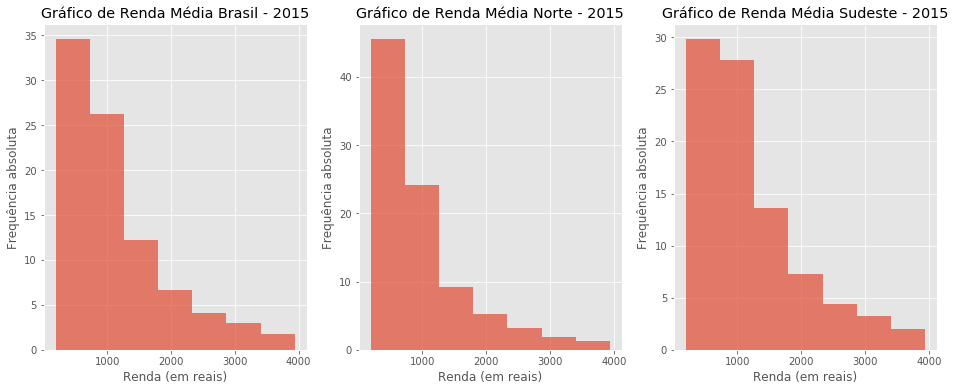

In [73]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(131)
faixa = range(197,3940,534) #1/4 sal min = 197// mais de 5 sal min = 3941// isso tuod dividido em 4 faixas
plot = renomear.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Brasil - 2015', weights=zeros_like(renomear.Renda)+1./renomear.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')

plt.subplot(132)
plot = tabelanorte.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Norte - 2015', weights=zeros_like(tabelanorte.Renda)+1./tabelanorte.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



plt.subplot(133)
plot = tabelasudeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sudeste - 2015', weights=zeros_like(tabelasudeste.Renda)+1./tabelasudeste.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



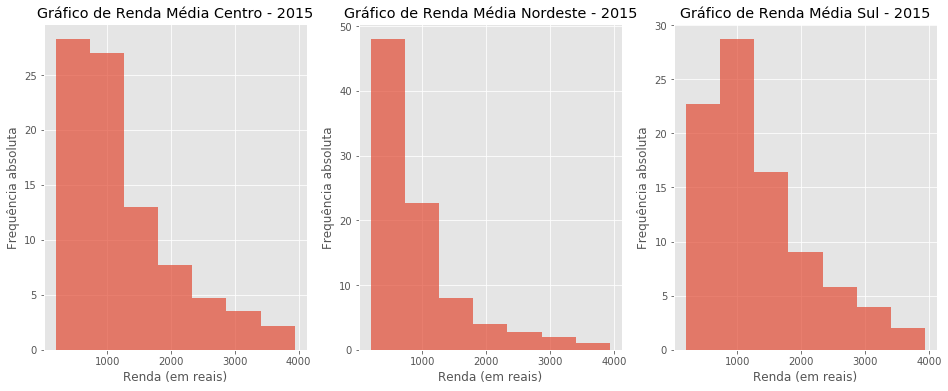

In [75]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(131)
faixa = range(197,3940,534) #1/4 sal min = 197// mais de 5 sal min = 3941// isso tuod dividido em 4 faixas


plot = tabelacentro.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Centro - 2015', weights=zeros_like(tabelacentro.Renda)+1./tabelacentro.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')

plt.subplot(132)

plot = tabelanordeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Nordeste - 2015', weights=zeros_like(tabelanordeste.Renda)+1./tabelanordeste.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



plt.subplot(133)
plot = tabelasul.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sul - 2015', weights=zeros_like(tabelasul.Renda)+1./tabelasul.Renda.size*100, alpha=0.7)
plt.ylabel('Frequência absoluta')
plt.xlabel('Renda (em reais)')



In [76]:
#tabelasul

#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#plot = tabelasul.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sul - 2015', weights=zeros_like(tabelasul.Renda)+1./tabelasul.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')




In [77]:
#tabelanorte
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelanorte.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelanorte.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Norte - 2015', weights=zeros_like(tabelanorte.Renda)+1./tabelanorte.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

In [78]:
#tabelanordeste
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelanordeste.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelanordeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Nordeste - 2015', weights=zeros_like(tabelanordeste.Renda)+1./tabelanordeste.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

In [79]:
#tabelacentro
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelacentro.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelacentro.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Centro - 2015', weights=zeros_like(tabelacentro.Renda)+1./tabelacentro.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

In [80]:
#tabelasudeste
#faixa = range(197,3940,534)  #788 - salario minimo    #baseando com uma comparacao c a quali (788,4685,670)
#Renda_cat = pd.cut(tabelasudeste.Renda, bins=faixa)
#Renda_cat.value_counts(sort=False, normalize=True)*100


#fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
#plot = tabelasudeste.Renda.plot.hist(bins=faixa,title='Gráfico de Renda Média Sudeste - 2015', weights=zeros_like(tabelasudeste.Renda)+1./tabelasudeste.Renda.size*100, alpha=0.7)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)
#for c, p in zip(col, patches):
#    plt.setp(p, 'facecolor', cm(c))
#plt.ylabel(' %')
#plt.xlabel('renda (em reais)')

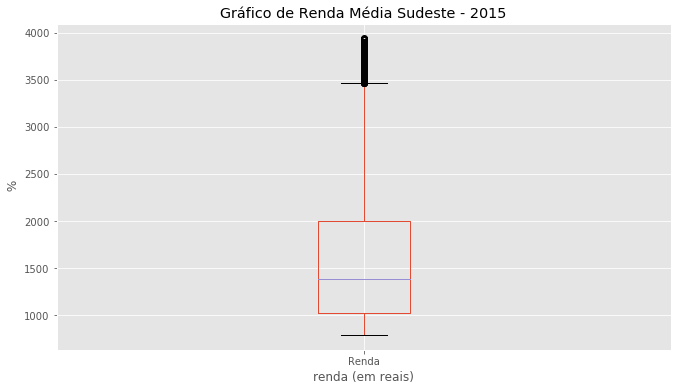

In [16]:
#plotando em boxplot

#tabelasudeste
renda_box = tabelasudeste.Renda[(tabelasudeste.Renda < 3940) & (tabelasudeste.Renda > 788)]



fig = plt.figure(figsize=(11,6))
#plt.subplot(121)

#cm = plt.cm.get_cmap('RdYlBu_r')
plot = renda_box.plot(kind = "box", title='Gráfico de Renda Média Sudeste - 2015')

plt.ylabel(' %')
plt.xlabel('renda (em reais)')

#consistente c a escolha c salarios minimos


In [82]:
cruzamento_5 = pd.crosstab(renomear["Salario"], renomear["Internet via 3G e 4G"], normalize="index")
cruzamento_7 = pd.crosstab(renomear["Salario"], renomear["Internet via banda larga"], normalize="index")
cruzamento_8 = pd.crosstab(renomear["Salario"], renomear["Internet via conexao discada"], normalize="index")


In [95]:
#cruzamento_5*100

In [94]:
#cruzamento_7*100

In [93]:
#cruzamento_8*100

### Interpretação conexões e opcões escolhidas conforme as faixas salariais 
A partir da análise dos gráficos nota-se que a internet discada nao é mais uma opcao entre a maioria das faixas de renda no Brasil, uma vez que por ser antiquadra e necessitar de uma linha telefônica para transmitir os dados, acaba sendo muito mais inviável e lenta. Enquanto isso, a banda larga usa diferentes sistemas, além do telefônico, que permitem transmissões muito mais velozes. Já a conexão 3G/4G não a necessidade de fios; por se tratar de uma tecnologia móvel e é bem potente, e compete fielmente com a internet banda larga e que tende no futuro breve a até substitui-la permanentemente, já que apresenta maior aceitação já na maioria das faixas salariais. 

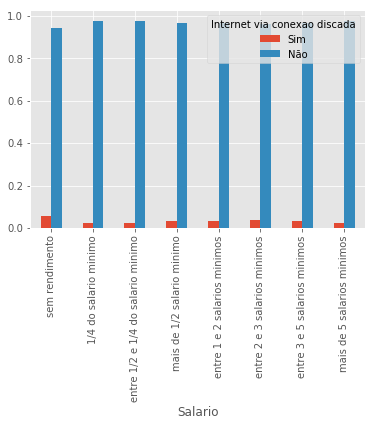

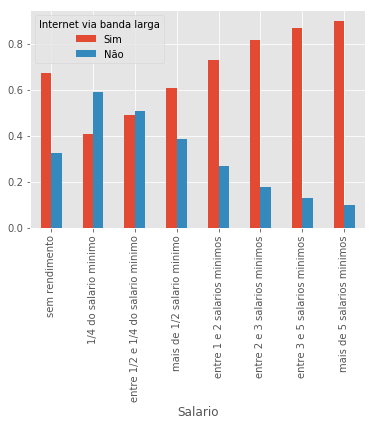

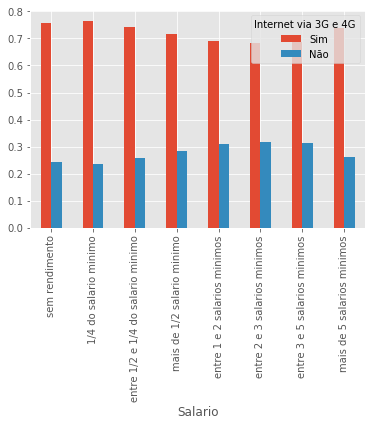

In [87]:
#grafico qualitativo/quant que indica o acesso a internet 3G e 4G e a internet banda larga 
#pois as taxas para obtenção do serviço ainda são consideravelmente altas e a área de cobertura é relativamente restrita, principalmente para certos locais com uma infraestrutura mais precoce.
#Assim é possível notar que a internet banda larga é ainda a mais optada no pais por suas inúmeras vantagens, e nas faixas salariais mais altas é , mas 

cruzamento_8.plot(kind="bar")

cruzamento_7.plot(kind="bar")

cruzamento_5.plot(kind="bar")


In [96]:
#conectividade x regiao
cruzamento_2 = pd.crosstab(dados["Regiao"], dados["Conectividade"], normalize="index") 
cruzamento_2*100

Conectividade,Baixa conexao (Discada),Boa conexao (Banda larga e discada),Excelente conexao (3g4g e banda larga),Excepcional conexao (todas),Media conexao (Banda Larga),Otima conexao (Discada e 3g4g),Razoavel conexao (3G e 4G)
Regiao,,,,,,,
Centro-Oeste,0.196489,0.641865,45.546241,0.930050,25.307833,1.454021,25.923500
Nordeste,0.233144,0.762445,35.116572,0.270951,30.957782,1.247637,31.411468
Norte,0.291545,0.595766,28.241856,0.342249,16.757510,2.104196,51.666878
Sudeste,0.379267,0.571080,46.213872,1.181394,25.886046,1.560661,24.207681
Sul,0.508333,0.616667,38.408333,0.316667,37.608333,1.150000,21.391667


In [21]:
#salario x regiao
cruzamento_1 = pd.crosstab( renomear["Salario"], renomear["Regiao"],normalize="index") 
cruzamento_1*100

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Salario,,,,,
sem rendimento,20.543807,9.365559,5.438066,46.223565,18.429003
1/4 do salario minimo,5.340224,50.645995,18.992248,18.776916,6.244617
entre 1/2 e 1/4 do salario minimo,8.111853,39.387832,18.692531,25.771508,8.036277
mais de 1/2 salario minimo,10.118148,29.178565,13.690576,32.566213,14.446498
entre 1 e 2 salarios minimos,12.153389,18.464093,10.241055,37.602536,21.538926
entre 2 e 3 salarios minimos,13.087622,14.742698,9.165508,38.358832,24.645341
entre 3 e 5 salarios minimos,13.670614,15.984930,8.449946,37.818443,24.076067
mais de 5 salarios minimos,16.641250,13.438811,6.404880,40.983607,22.531453


In [99]:
#salario x conectividade
cruzamento = pd.crosstab(renomear["Salario"], renomear["Conectividade"], normalize="index") 
    
cruzamento*100


Conectividade,Baixa conexao (Discada),Boa conexao (Banda larga e discada),Excelente conexao (3g4g e banda larga),Excepcional conexao (todas),Media conexao (Banda Larga),Otima conexao (Discada e 3g4g),Razoavel conexao (3G e 4G)
Salario,,,,,,,
sem rendimento,0.604230,0.604230,41.087613,2.416918,23.262840,1.812689,30.211480
1/4 do salario minimo,0.430663,0.301464,17.614126,0.258398,22.782084,1.335056,57.278208
entre 1/2 e 1/4 do salario minimo,0.314901,0.541630,23.227107,0.314901,25.028341,1.108452,49.464668
mais de 1/2 salario minimo,0.341564,0.615936,32.711798,0.464752,27.319559,1.674226,36.872165
entre 1 e 2 salarios minimos,0.347240,0.714609,41.714056,0.825323,29.802224,1.529868,25.066680
entre 2 e 3 salarios minimos,0.375522,0.751043,49.791377,0.931850,30.514604,1.752434,15.883171
entre 3 e 5 salarios minimos,0.340868,0.663796,55.077144,1.004665,30.265518,1.255831,11.392178
mais de 5 salarios minimos,0.190621,0.514678,63.248189,0.781548,25.600457,0.895921,8.768586


In [23]:
#COONECTIVIDADE - REGIAO

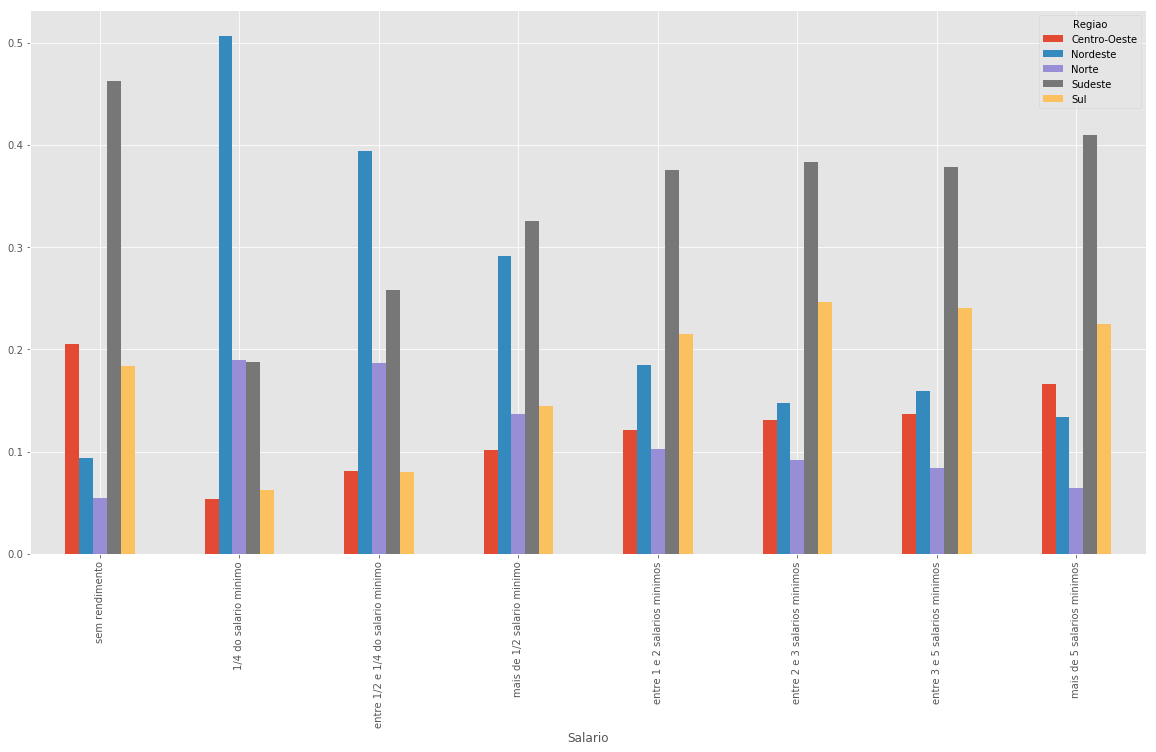

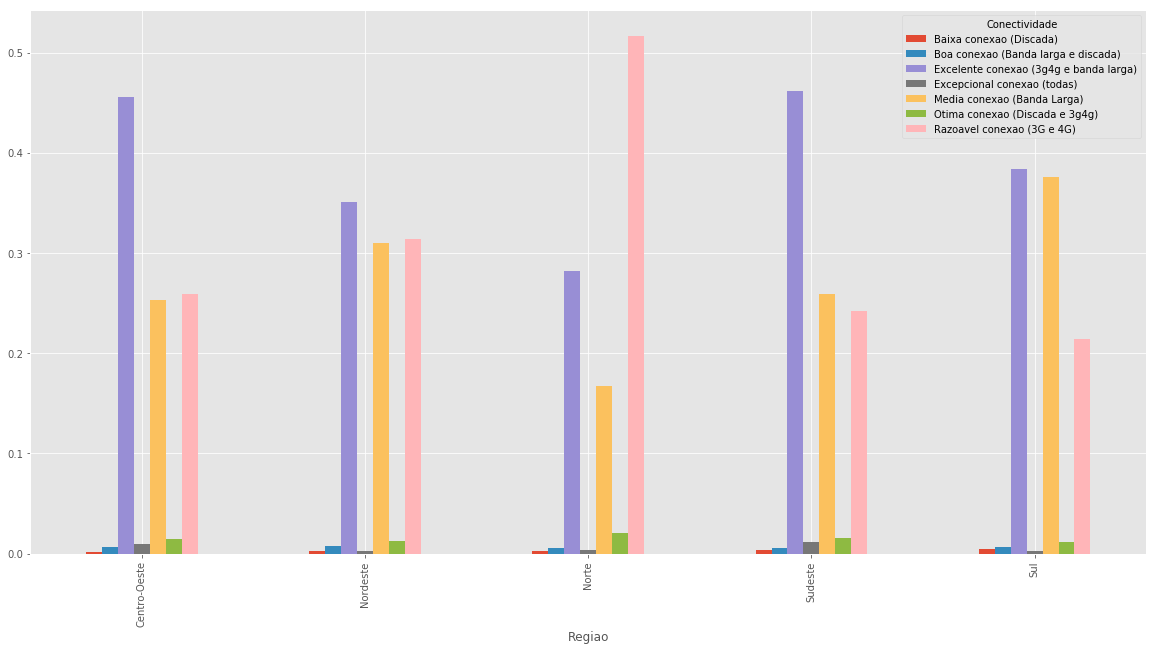

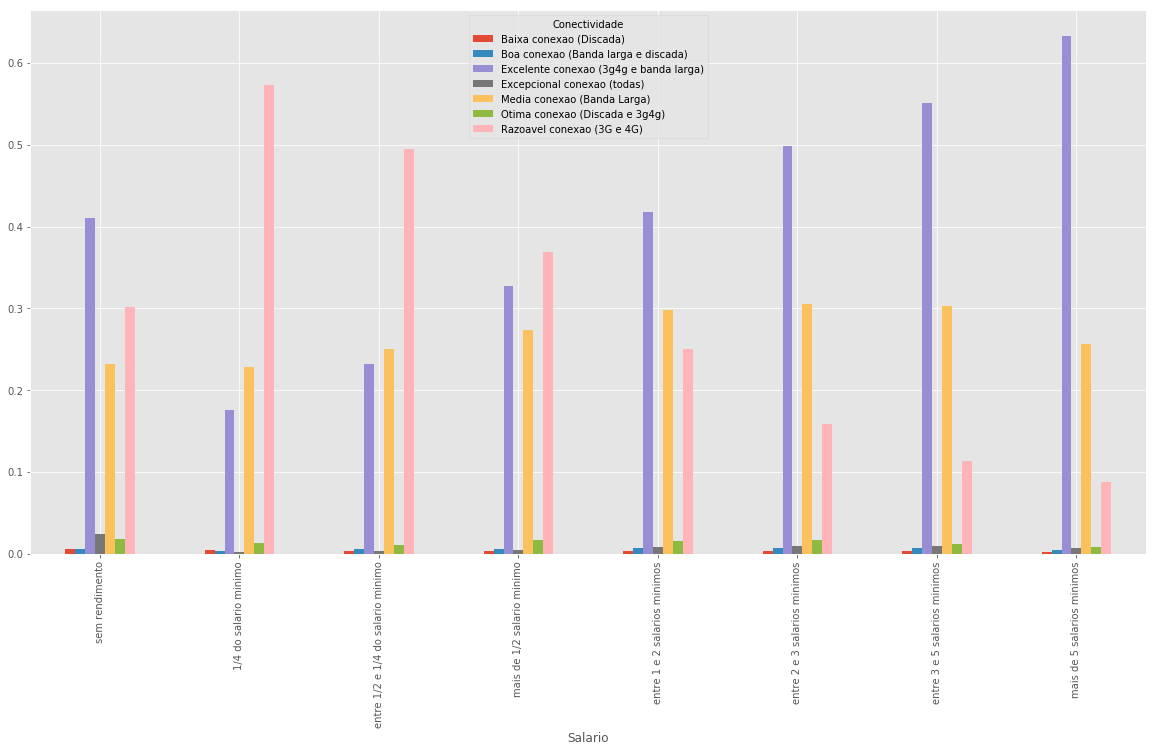

In [100]:
###############################################################IMPORT######################
cruzamento_1.plot(kind="bar", figsize = (20,10))
cruzamento_2.plot(kind="bar",figsize = (20,10))
cruzamento.plot(kind="bar",figsize = (20,10))

#da para perceber com a tabela que a partir de quando a pessoa ganha mais que 0.5 salario minimo 
#seu investimento com a conectividade aumenta e passa de separadamente sair de apenas 1 tipo de conectividade para mais que um 
#o que mais se destaca é o de banda larga e 3g4g (custo mais alto) que cresce cerca de 10"pontos" a mais que comparado 
#a faixa salarial anterior, porem a opcao por apenas 1 apesar de decrescer bastante ainda é bem alta 
#ja quando a populacao tem acesso a mais de 1(ate 2)salarios e entre 2 e 3 é notavel grandes saltos de "conectividade" porem a 
#opcao apenas pela banda larga continua sendo "viavel" pelo que demonstra os dados

In [101]:
#x = cruzamento_3 * 100
#x.describe()

#cruzamento_3.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (5,10),layout=(2,1), autopct="%0.2f",legend=False)
#cruzamento da faixa salarial com o nivel de conectividade




In [112]:
#plot = cruzamento_3.T.plot(kind='bar',color=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'), stacked=True,title='Banda Larga x salario')
#Para legenda ficar fora do gráfico
#ax = plt.subplot(111)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [28]:
#comparando ambos --- 
#conexao apenas 3g4g é mais escolhida em faixas de salario menor se comparado a banda larga, que é muito alta e relevante
#as faixas salariais mais elevadas, 





#cruzamento_3 * 100
#cruzamento_3.plot

#cruzamento_4 * 100
#cruzamento_4.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (25,12),layout=(1,2), autopct="%0.2f",legend=False, title = "Internet 3G,4G por salario")
#plt.plot()


In [29]:
cruzamento_3 = pd.crosstab(renomear["Salario"], renomear["Internet via banda larga"], normalize="index")
cruzamento_4 = pd.crosstab(renomear["Salario"], renomear["Internet via 3G e 4G"], normalize="index")

#cruzamento da faixa salarial com relacao a Internet via banda larga, o que demonstra que quanto maior poder aquisitivo 
#maior o acesso a banda larga 

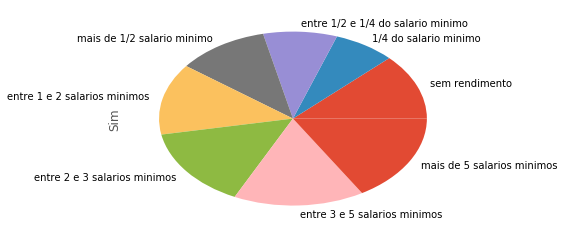

In [111]:
(cruzamento_3["Sim"]*100).plot(kind="pie")

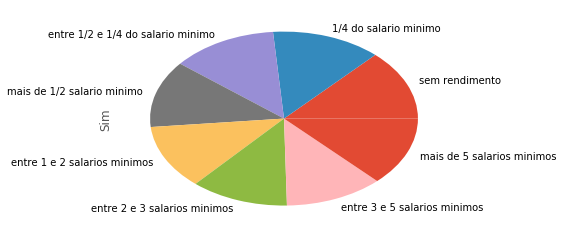

In [31]:
(cruzamento_4["Sim"]*100).plot(kind="pie")

In [32]:
dados["Conectividade"].value_counts()  

Excelente conexao (3g4g e banda larga)    26488
Razoavel conexao (3G e 4G)                19160
Media conexao (Banda Larga)               18618
Otima conexao (Discada e 3g4g)              971
Excepcional conexao (todas)                 450
Boa conexao (Banda larga e discada)         422
Baixa conexao (Discada)                     223
Name: Conectividade, dtype: int64

# Outras ideias

Nota-se que por meio de toda essa análise de tabelas e gráficos que a internet 3G4G associada a banda larga vem sendo o conjunto mais escolhido pelos brasileiros segundo a PNAD 2015 


In [33]:
#plot = cruzamento_4.T.plot(kind='bar',color=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'), stacked=True,title='Internet 3g4g x salario')
#Para legenda ficar fora do gráfico
#ax = plt.subplot(111)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [34]:
#f, axarr = plt.subplots(2,figsize=(9,12))
#axarr[0].hist(cruzamento_3, bins=9)
#axarr[0].set_title('Banda Larga x Salario')
#axarr[0].set_xlabel('')
#axarr[0].set_ylabel('')

#axarr[1].hist(cruzamento_3, bins=9)
#axarr[1].set_title('3g4g x Salario')
#axarr[1].set_xlabel('')
#axarr[1].set_ylabel('')

#    axarr[2].hist(dados.RENDA, bins=15, normed=1, alpha=0.5)
#   axarr[2].set_title('Histograma')
#   axarr[2].set_xlabel('Renda')
#   axarr[2].set_ylabel('Densidade')

#plt.tight_layout(1)

In [35]:
renomear.to_csv("Resumo.csv")                        #criando o arq no excel

In [36]:
#dados.V4622.describe()
#dados.V4622.quantile

___
## Conclusão 

Descreva aqui suas conclusões!